In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container {width:95% !important ; }</style>"))

# packages

In [1]:
from matplotlib import font_manager
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest

# font_manager.get_font_names() 전체 폰트이름 확인
# 고딕이나 나눔 관련한 폰트 입력하면됨
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 음수

import warnings
warnings.filterwarnings('ignore')

# ADP 27회 실기 문제

# 문제설명 (1번)
- 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv    
- 출처 :https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (후처리)    
신용카드 사용에 대한 데이터이다. 각 컬럼의 의미는 다음과 같다.    
Time : 카드 이용 시점의 시각 (sec)    
V1 ~ V25 : 유저 특성에 관한 피쳐 (float)    
Amount : 거래금액    
Class : 0: 정상거래 , 1: 이상거래

## 문제 1-1 
EDA 데이터 탐색 (시각화 포함)

- 데이터 샘플 확인


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23.0,1.173285,0.353498,0.283905,1.133563,-0.172577,-0.916054,0.369025,-0.327260,-0.246651,...,0.067003,0.227812,-0.150487,0.435045,0.724825,-0.337082,0.016368,0.030041,41.88,0
1,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
2,36.0,1.095525,-0.116085,1.397912,1.497547,-1.049124,0.072839,-0.723802,0.287532,0.996327,...,-0.033234,0.093262,0.089498,0.361261,0.250963,-0.378280,0.081024,0.034227,2.09,0


- 데이터 유형 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5900 non-null   float64
 1   V1      5900 non-null   float64
 2   V2      5900 non-null   float64
 3   V3      5900 non-null   float64
 4   V4      5900 non-null   float64
 5   V5      5900 non-null   float64
 6   V6      5900 non-null   float64
 7   V7      5900 non-null   float64
 8   V8      5900 non-null   float64
 9   V9      5900 non-null   float64
 10  V10     5900 non-null   float64
 11  V11     5900 non-null   float64
 12  V12     5900 non-null   float64
 13  V13     5900 non-null   float64
 14  V14     5900 non-null   float64
 15  V15     5900 non-null   float64
 16  V16     5900 non-null   float64
 17  V17     5900 non-null   float64
 18  V18     5900 non-null   float64
 19  V19     5900 non-null   float64
 20  V20     5900 non-null   float64
 21  V21     5900 non-null   f

None

- 데이터 기초통계량 확인


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,...,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000
mean,34843.708644,-0.403448,0.116005,0.418754,0.302098,-0.397897,0.015096,-0.299454,0.142078,-0.066877,...,-0.011297,-0.116133,-0.047313,0.001418,0.136734,0.033682,0.019165,0.005559,97.435436,0.030000
std,14439.632538,2.461703,1.958243,2.519640,1.673844,1.855859,1.330093,2.002929,1.522908,1.307326,...,0.727395,0.636932,0.758799,0.591048,0.471545,0.502810,0.404419,0.308767,273.674664,0.170602
min,23.000000,-30.552380,-38.305310,-31.103685,-4.434211,-22.105532,-17.574835,-21.922811,-25.399133,-9.283925,...,-13.977283,-5.619439,-25.356744,-2.721546,-6.035054,-1.338556,-6.126486,-8.424041,0.000000,0.000000
25%,28757.250000,-1.055510,-0.558766,0.137922,-0.695648,-0.930389,-0.675800,-0.621884,-0.135614,-0.691489,...,-0.225493,-0.530802,-0.182136,-0.320867,-0.133045,-0.325799,-0.060991,-0.005390,6.850000,0.000000
50%,38004.000000,-0.272564,0.102035,0.726057,0.238589,-0.325063,-0.174479,-0.088259,0.072420,-0.096082,...,-0.058451,-0.091832,-0.053651,0.062366,0.166192,-0.062885,0.010544,0.023643,25.990000,0.000000
75%,45616.750000,1.145628,0.782316,1.382378,1.107154,0.263630,0.465859,0.411312,0.358367,0.630021,...,0.125615,0.307648,0.077943,0.398618,0.426102,0.327371,0.089431,0.080838,89.990000,0.000000
max,53937.000000,1.628532,16.713389,4.226108,11.927512,23.046242,7.885721,14.785051,20.007208,6.956877,...,11.851446,4.393846,13.876221,3.679740,5.525093,3.463246,5.794075,4.957651,11898.090000,1.000000


- 데이터 결측 확인


Series([], dtype: int64)

- 데이터 분포 시각화


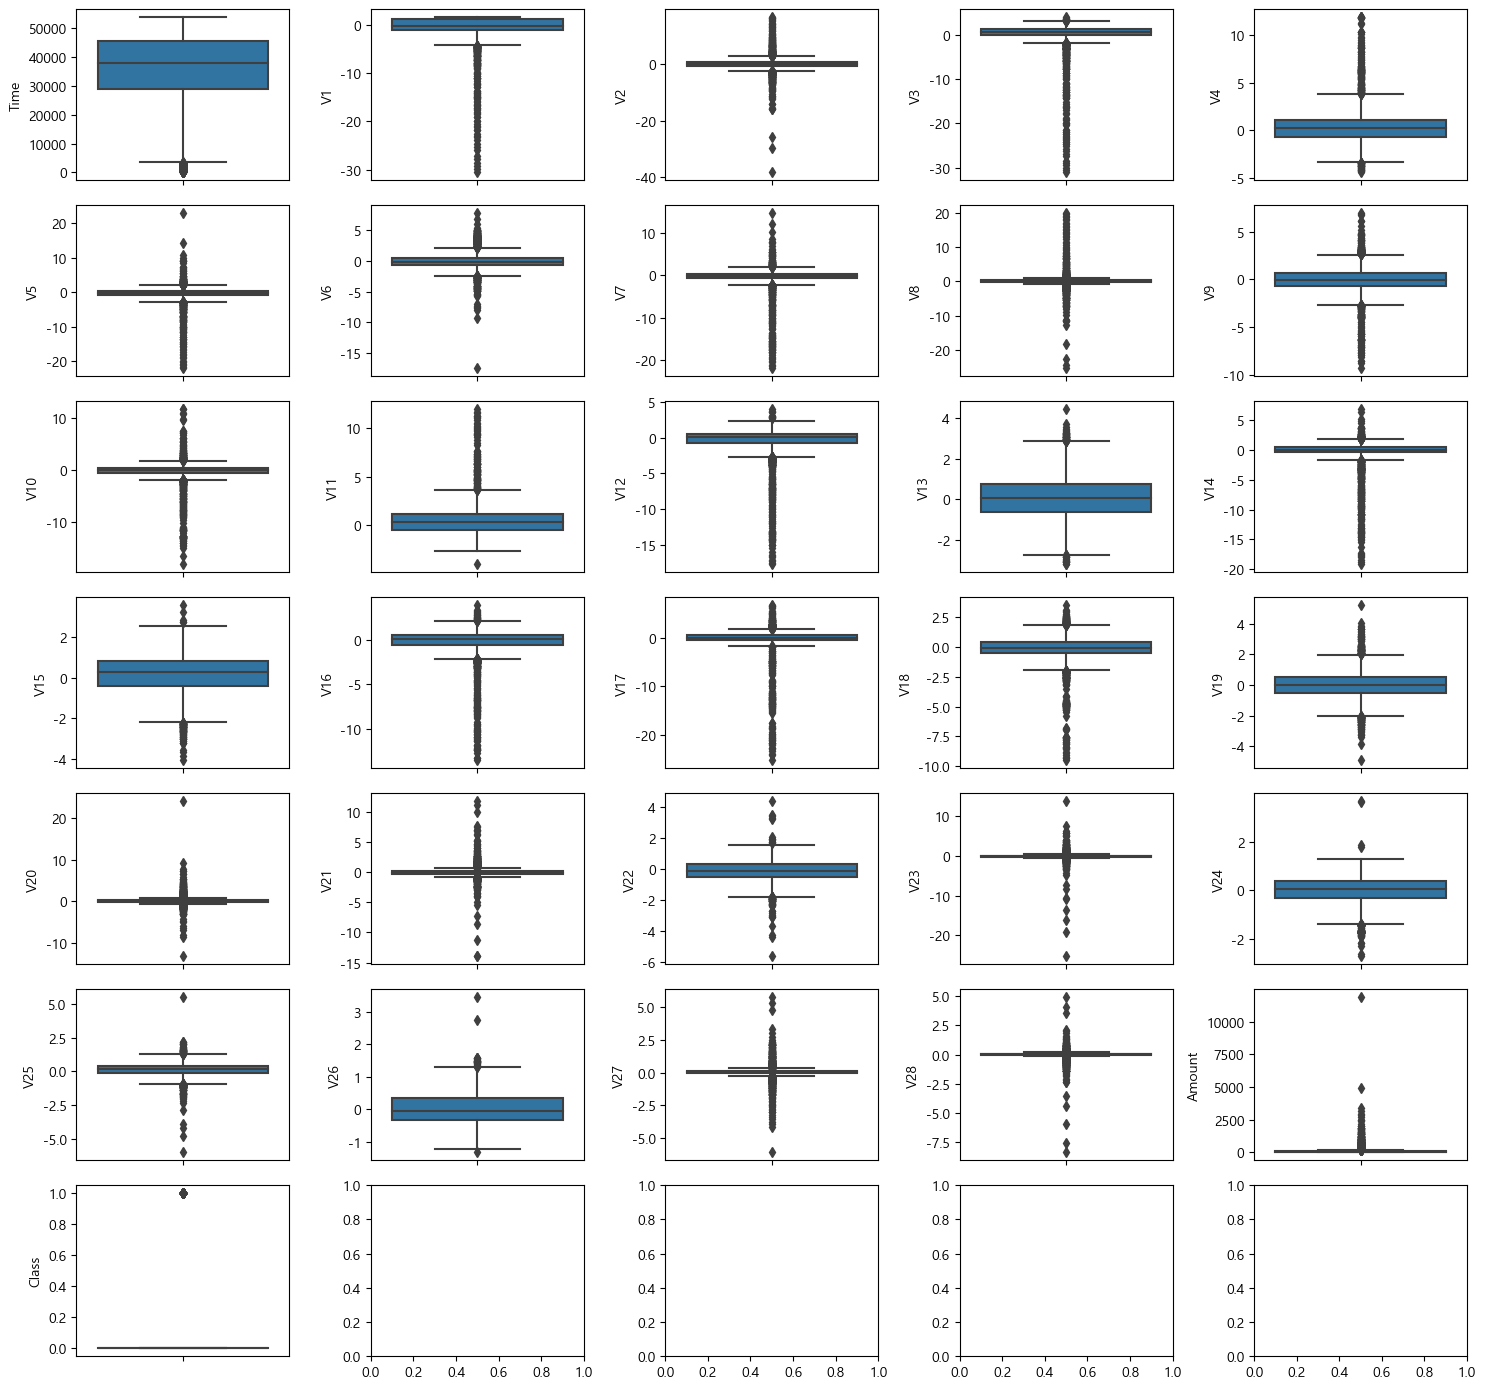

- 이상치 처리


In [2]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv')
print('- 데이터 샘플 확인')
display(df.head(3))
print('- 데이터 유형 확인')
display(df.info())
print('- 데이터 기초통계량 확인')
display(df.describe())
print('- 데이터 결측 확인')
display(df.isna().sum()[df.isna().sum()>0])
print('- 데이터 분포 시각화')

n_col = 5
n_row = math.ceil(len(df.columns)/n_col)

fig, axs = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*2))

for r in range(0, n_row):
    for c in range(0, n_col):
        i = r*n_col + c
        if i < len(df.columns):
            sns.boxplot(y = list(df.columns)[i], data = df, ax = axs[r][c])
plt.tight_layout()
plt.show()

print('- 이상치 처리')
del_idx = []
del_idx.extend(list(df[df.Amount  > 7500].index))
df2 = df.drop(del_idx, axis = 0)

#### [답안]
- 데이터는 30개의 연속형 변수, 바이너리형 타겟변수로 구성되어있다.
- time(초) 데이터는 23 ~ 53,937까지의 넓은 스케일을 가지고 있고 amount도 0 ~ 11,898까지의 넓은 스케일을 가지고 있다.
- 이상치를 확인해 본 결과 amount 변수의 최대값이 박스에서 크게 변어난 점을 발견했다. 삭제처리하면 될 것으로 보인다.

## 문제 1-2 
변수간 상관관계를 시각화하고 전처리가 필요하다면 그 이유를 설명하고 시행하라

- 상관관계 확인


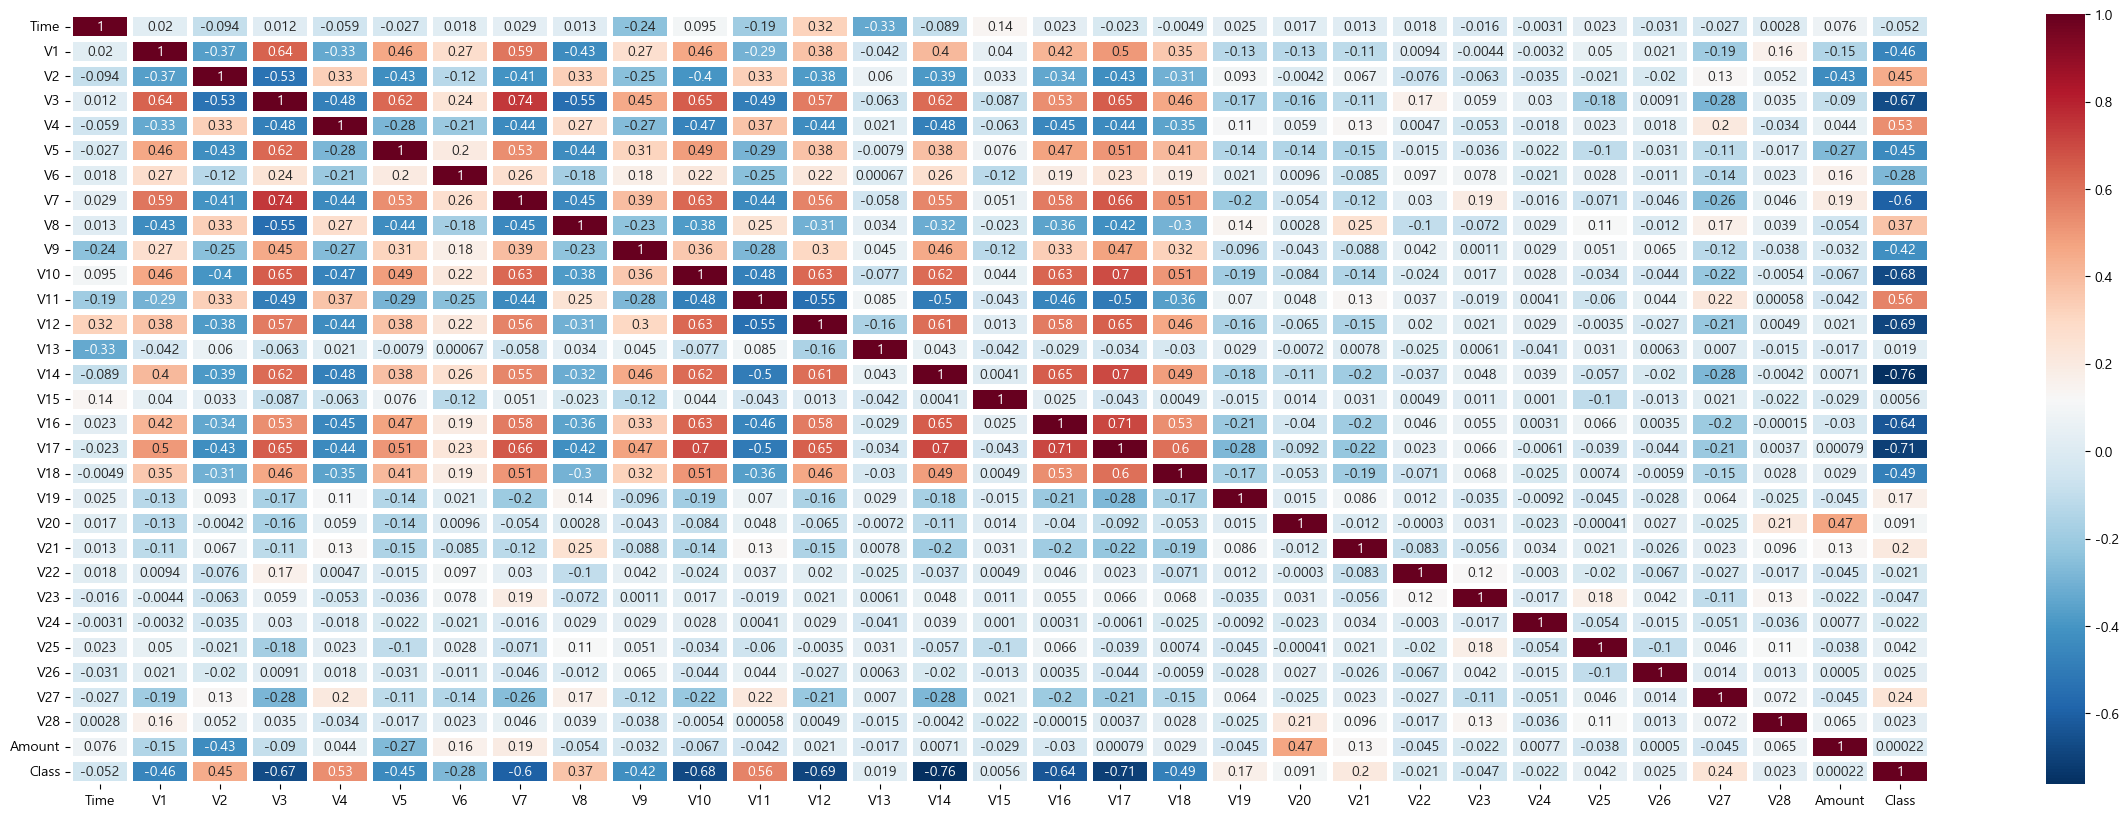

In [3]:
print('- 상관관계 확인')
df_cor = df2.corr(method = 'pearson')
fig, axs = plt.subplots(1, 1, figsize = (30, 10))
sns.heatmap(df_cor,
           xticklabels = df_cor.columns,
           yticklabels = df_cor.columns,
           cmap = 'RdBu_r',
           annot = True, linewidth = 3)
plt.show()

#### [답안] (21분 소요)
- 상관관계행렬을 살펴본 결과 V1~V18 변수끼리의 상관관계가 높아서 다중공선성의 문제가 우려된다. class와 상관성이 높은 변수는 v12, v17과 -0.7보다 큰 음의 상관성이 보인다.

## 문제 2.1 
차원축소 방법 2가지 이상에 대해 설명하고 장단점을 비교하라

#### [답안]
- 차원축소 방법에는 주성분 분석과 요인분석이 있다.
- 주성분 분석은 예측변수들에 가중치를 적용한 선형결합이며 예측변수들의 상관관계가 가장 잘 설명하는 선형결합이다. 주성분 분석의 장점은 고차원의 데이터를 손실을 최소화하면서 효율적로 축소할 수 있다. 단점은 그래프의 축을 해석하기 쉽지 않고 선형변환의 한계로 비선형 구조를 반영하지 못한다.
- 요인분석은 다수 변수들을 변수 간의 상관관계를 분석하여 공통 차원들을 통해 축약하는 통계기법이다. 요인분석의 장점은 변수축소와 불필요한 변수를 제거할 수 있다. 단점은 요인분석 결과의 해석이 주관적일 수 있으며, 요인이 무엇을 나타내는지 명확하게 정의하기 어렵다는 점이다.

## 문제 2.2
2.1에서 선택한 한가지 차원축소 방법을 실제로 수행하고 선택한 이유를 설명하라

In [4]:
# 주성분 분석 선택
# 주성분 분석의 목적은 데이터의 분산을 최대한 설명하고 차원 축소를 수행하는 것인면 요인분석은 관찰된 변수의 상호작용과 잠재적인 구조를 추론하는 것을 중점이므로 주성분 분석을 선택하였다.

x_col = list(df2.columns)
x_col.remove('Class')
df2_x = df2[x_col]

# 데이터 표준화
ss = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(df2_x), columns = df2_x.columns)

# PCA 적합
model = PCA(n_components=df2_x.shape[1], svd_solver = 'auto')
model.fit(scaled_x)

# 고유값 요약
e_value = pd.DataFrame({'고유값':model.explained_variance_, '기여율':model.explained_variance_ratio_}, 
                      index = ['comp%s'%i for i in range(1, df2_x.shape[1]+1)])
e_value['누적기여율'] = e_value['기여율'].cumsum()
print('고유값 요약:\n', e_value, '\n')

print('\n comp1~15가 전체 분산의 80%를 설명하고 있으므로 n_components를 15로 하여 다시 만든다.')
# PCA 재적합
best_dim = 15
model = PCA(n_components=best_dim, svd_solver = 'auto')
model.fit(scaled_x)
pca_x = model.fit_transform(scaled_x)

# 고유벡터 요약
e_vector = pd.DataFrame(model.components_, index = ['comp%s'%i for i in range(1, best_dim+1)],
                       columns = scaled_x.columns)
print('고유벡터 요약:\n', e_vector.iloc[:, :5], '\n')

고유값 요약:
              고유값       기여율     누적기여율
comp1   7.867730  0.262213  0.262213
comp2   1.825357  0.060835  0.323048
comp3   1.602484  0.053407  0.376455
comp4   1.368025  0.045593  0.422048
comp5   1.295551  0.043178  0.465226
comp6   1.208942  0.040291  0.505517
comp7   1.143549  0.038112  0.543629
comp8   1.077551  0.035912  0.579541
comp9   1.045378  0.034840  0.614381
comp10  1.035383  0.034507  0.648888
comp11  0.955440  0.031843  0.680731
comp12  0.908896  0.030291  0.711022
comp13  0.872459  0.029077  0.740099
comp14  0.805531  0.026846  0.766946
comp15  0.778132  0.025933  0.792879
comp16  0.761064  0.025365  0.818244
comp17  0.667424  0.022244  0.840487
comp18  0.606750  0.020222  0.860709
comp19  0.586434  0.019544  0.880253
comp20  0.553030  0.018431  0.898685
comp21  0.511573  0.017050  0.915734
comp22  0.498596  0.016617  0.932351
comp23  0.441534  0.014715  0.947067
comp24  0.356711  0.011888  0.958955
comp25  0.345951  0.011530  0.970485
comp26  0.305747  0.010190  0

#### [답안] (27분)
- 주성분 분석의 목적은 데이터의 분산을 최대한 설명하고 차원 축소를 수행하는 것인면 요인분석은 관찰된 변수의 상호작용과 잠재적인 구조를 추론하는 것을 중점이므로 주성분 분석을 선택하였다.
- 전체 변수의 수만큼 pca를 수행했을때 comp1~15가 전체 분산의 80%를 설명하고 있으므로 n_components를 15로 하여 만들었다.

## 문제 3.1
오버샘플링과 언더샘플링에 대한 설명 및 장단점을 설명하라

#### [답안] 
- 오버샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증가시키는 방법으로 데이터손실이 없어 언더샘플링보다 성능이 유리하다는 장점이 있다. 랜덤오버샘플링과 SMOTE 방법이 있다.
- 언더샘플링은 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수준으로 감소시키는 방법으로 데이터불균형 문제는 피할 수 있지만 데이터수가 줄어들어 학습 성능을 떨어트리는 결과를 초래할 수 있다는 단점이 있다.

## 문제 3.2 
오버샘플링 및 언더샘플링 방식 중 하나를 선택하여 구현하고 Class를 종속변수로 하는 분류 모델을 2가지 이상 구현하고 성능을 비교하라

In [5]:
print('- 오버샘플링 수행')
print('오버샘플링 전 건수 : ', df2.Class.value_counts())
smote_sample = SMOTE(sampling_strategy = 'minority')
sm_x, sm_y = smote_sample.fit_resample(pca_x, df2.Class)
print('오버샘플링 후 건수 : ', sm_y.value_counts())

print('\n- 분류모델링') 
x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, random_state = 123, test_size = 0.3)

xgb = XGBClassifier(n_estimators = 200)
model_xgb = xgb.fit(x_train, y_train)

logit = LogisticRegression()
model_logit = logit.fit(x_train, y_train)

pred_xgb = model_xgb.predict(x_test)
pred_logit = model_logit.predict(x_test)

acc_xgb = accuracy_score(pred_xgb, y_test)
acc_logit = accuracy_score(pred_logit, y_test)

print('정확도 평가 결과 1. xgboost: {:.4f}, 2. 로지스틱회귀: {:.4f}'.format(acc_xgb, acc_logit))


- 오버샘플링 수행
오버샘플링 전 건수 :  Class
0    5722
1     177
Name: count, dtype: int64
오버샘플링 후 건수 :  Class
0    5722
1    5722
Name: count, dtype: int64

- 분류모델링
정확도 평가 결과 1. xgboost: 0.9953, 2. 로지스틱회귀: 0.9386


#### [답안] 23분
- 성능에 영향을 비교적 덜 미치는 오버샘플링을 선택하여 적용하였다. 소수의 레이블 건수가 177에서 5,722건으로 증가하였다.
- 분류모델은 xgboost와 로지스틱회귀를 선택하였고 데이터를 학습데이터와 테스트 데이터로 나누어서 모델을 적용하였고 정확도를 살펴본 결과 xgboost는 0.9933, 로지스틱회귀분석은 0.9397로 xgboost의 정확도가 더 높은 것을 알 수 있다.

## 문제 4.1 
Class 컬럼이 주어지지 않았다고 가정하고 비지도 학습 방식의 이상탐지 모델을 만들려고한다.     
이상 탐지 모델 2가지 이상 기술하고 장단점을 설명하라

#### [답안]
- 이상 탐지 모델은 DBSCAN과 Isolation Forest가 있다.
- DBSCAN은 밀도 기반 클러스터링 알고리즘으로 데이터 포인트 주변의 밀도를 기반으로 이상치를 식별합니다. 밀도가 낮은 데이터 포인트를 이상치로 간주한다. 장점으로는 클러스터의 개수를 미리 지정할 필요가 없으며 비선형과 같은 복잡한 형상도 찾을 수 있다. 반면, 단점으로는 군집화 할 데이터의 수가 많아질수록 알고리즘 수행시간이 급격히 늘어난다.
- Isolation Forest는 이상치를 찾기위해 결정트리를 사용하며, 랜덤하게 데이터를 분할하여 이상치를 탐지합니다. 속도가 빠르고 이상치에 강인하다는 장점이 있고 단점으로는 이상치 비율을 사전에 설정해야하는 단점이 있습니다. 

## 문제 4.2 
2번에서 만든 데이터로 한 가지 비지도학습 이상탐지 모델을 구현하고, 3번에서 만든 모델과 결과를 비교하라

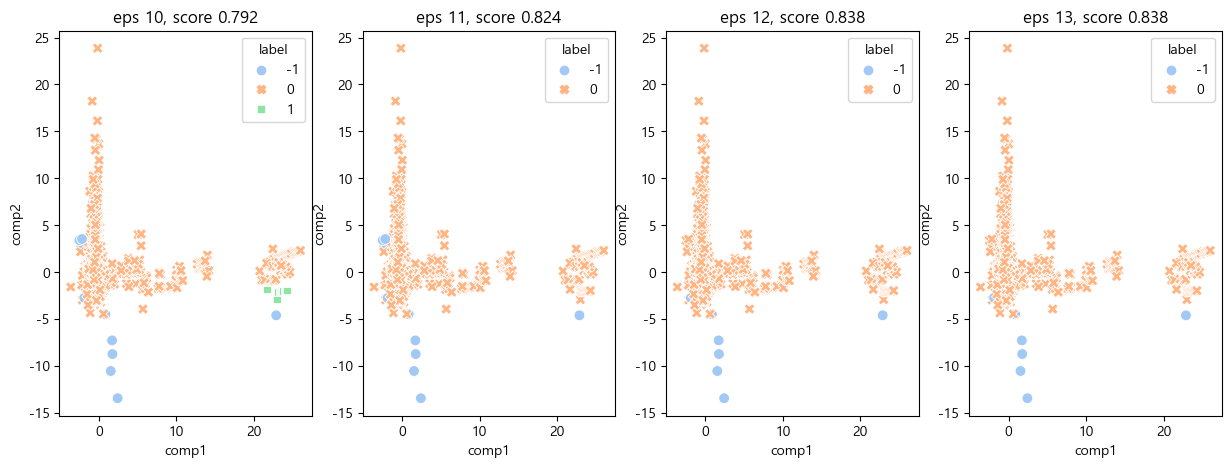

비지도학습 정확도 평가 결과 1. DBSCAN : 0.9688, 2. Isolation Forest : 0.0105


In [6]:
# 데이터프레임으로 변환
df_pca_x = pd.DataFrame(pca_x)
df_pca_x.columns = ['comp%s'%i for i in range(1, best_dim+1)]


# 적정한 eps정하기 
# eps를 증가시키면 하나의 클러스터에 더 많은 포인트가 포함됨. 이는 클러스터를 커지게 하며, 여러 클러스터를 하나로 합치게 만듬. 
# min_samples는 클러스터의 최소 크기를 결정함.
eps_list = [10, 11, 12, 13] # eps 후보군
fig, axes = plt.subplots(1, 4, figsize = (15, 5))
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps = eps, min_samples = 5).fit(df_pca_x)

    temp_df = df_pca_x
    temp_df['label'] = db.labels_
    sns.scatterplot(x = 'comp1', y = 'comp2', data = temp_df, hue = 'label', style = 'label', s = 60, ax = ax, palette = 'pastel',
                   )
    score = silhouette_score(df_pca_x, db.labels_)
    ax.set_title('eps {}, score {:.3f}'.format(eps, score))
    
    # 레이블 중 노이즈를 빼고 클러스터의 개수 계산
#     n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
#     n_noise_ = list(db.labels_).count(-1)

#     print(f'Eps: {eps}, 추정된 클러스터 수: {n_clusters_}, 추정된 노이즈 포인트 수: {n_noise_}')
    
plt.show()

# 확정한 eps기반으로 각 데이터의 군집 반환
eps = 12
db = DBSCAN(eps = 12, min_samples = 5).fit(df_pca_x)
db_result = pd.DataFrame(db.labels_, columns = ['cluster']) # 각 데이터의 군집 반환

acc_dbscan = accuracy_score(db_result, df2.Class)

# Isolation Forest 모델 생성
clf = IsolationForest(contamination=0.05, random_state=42)  # contamination은 이상치 비율을 나타냅니다.
clf.fit(df_pca_x)

# 각 데이터 포인트의 이상치 스코어 예측
scores = clf.decision_function(df_pca_x)

# 이상치 여부 확인(1: 정상, -1: 이상치)
clf_result = clf.predict(df_pca_x)

# 이상치 포인트 확인
acc_clf = accuracy_score(clf_result, df2.Class)
print('비지도학습 정확도 평가 결과 1. DBSCAN : {:.4f}, 2. Isolation Forest : {:.4f}'.format(acc_dbscan, acc_clf))

#### [답안] (1시간 30분)
- 비지도학습은 DBSCAN과 Isolation Forest를 적용하였다. DBSCAN는 eps를 증가시키며 만들었고 실루엣 계수가 1에 가까운 eps값을 정하여 모델을 생성하였다. 그 결과 DBSCAN을 사용한 것이 정확도가 0.9688로 Isolation Forest보다 나았다.
- 3번 분류의 xgboost와 비교하면 xgboost가 0.9959로 정확도가 더 높다.

## 문제 5
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 복합성장률 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

- 성장률 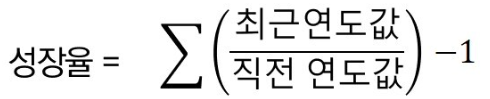
- AAGR(연간평균성장률, Average Annual Growth Rate) : 매 연도의 성장률을 평균한 개념 
  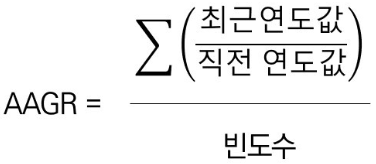
- CAGR(연간평균복합성장률, Compund Annual Growth Rate): 여러 해 동안의 평균 성장률을 산출하므로 시작 시점과 종료 시점의 정보만 반영됨.
  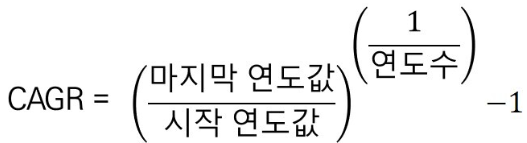

In [56]:
((250000/100000)**(1/3))-1

0.35720880829745316

## 문제 6
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [59]:
x = 15.5 # 표본평균
n = 12 # 표본크기
s = 3.2 # 표본 표준편차
conf_a = 0.1 # 구간추정을 위한 유의수준
df = n-1

from scipy.stats import t
SE = s/np.sqrt(n) # standard error
conf_t = t.ppf(1-conf_a/2, df) # critical value
ME = conf_t * SE # 오차의 한계 = 허용오차(margin of error)

print('구간 추정량: {:.3f}~{:.3f}'.format(x-ME, x+ME))

구간 추정량: 13.841~17.159


## 문제 설명 (7번)
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv

## 문제 7.1
귀무가설과 대립가설을 세우시오

## 문제 7.2
검정통계량 및 유의확률을 구하고 검정 결과를 서술하시오

## 문제설명(8번)
user_counts를 종속변수로 하는 데이터이다

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv

## 문제 8.1
분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

## 문제 8.2
8.1의 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오 

## 문제설명(9번)
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

- 데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/subway.csv

## 문제 9.1 
귀무가설과 대립가설 설정하라

## 문제 9.2
통계량을 구하고 검정 결과를 서술하라

참고사이트 
- https://blog.naver.com/clairefromkorea/222938928665
- https://amaruak00.github.io/2022/12/17/adp27th.html
- https://blog.naver.com/dmz04/222938757841